In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 載入資料

In [2]:
train_df=pd.read_csv("dataset/商品對照表_-_商品對照表.csv")
#train_df=pd.read_csv("dataset/家樂福數據集.csv")
# Create a dictionary from 'Name' and 'Age' columns


pid_to_name_dict = train_df.set_index('product')['product_name'].to_dict() #dict(): use 'product' column as a key to dict
print(len(pid_to_name_dict))
name_to_pid_dict = {v:k for k,v in pid_to_name_dict.items()}


train_df.head(5)

482


,id,order_date,product_name,product,sales_price,quantity,department,store,city,district,customer,sex,age_group
0,4dd5ac40-a1b3-43a2-be16-aa1392a4fde0,2021/6/10 22:57,絲花極柔化妝棉66片,003dc937-e898-4259-870a-4a9afe2eacd6,96,2,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0
1,181be294-2190-47db-bab6-519f76ccf681,2021/5/27 2:42,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0
2,4ec0b688-36e0-4018-99fa-045f6ca1e3cf,2021/9/9 23:16,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0
3,11d772a7-5a16-4e87-8ac2-0c438b1ada18,2021/7/2 9:56,新東陽雪花金錢豬肉乾,00818a2f-857a-402e-97e5-fed82eb24f50,139,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,73869acb-3d56-4375-9ba2-afe2bb3c2bf5,0ced232a-ba28-4238-8411-264c228aa751,9aa7200e-ff9f-42e4-b635-b021e6075b7e,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,NaN,4.0
4,a9174342-0889-4d43-b111-d604c05b28ee,2020/11/21 14:35,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,49171894-8056-4ffb-9242-472997c4b865,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,0053e832-3011-4464-9157-955cd5b1fb76,NaN,4.0


In [3]:
def create_product_dict(df):
    pid_to_price_dict = df.set_index('product')[['product_name','sales_price']].to_dict()
    pid_to_product_info={}
    for pid1, name in pid_to_price_dict['product_name'].items():
        for pid2, price in pid_to_price_dict['sales_price'].items():
            #print(pid1,pid2, name,price)   
            if pid1==pid2 :
                pid_to_product_info[pid1]=(name,price)
                #003dc937-e898-4259-870a-4a9afe2eacd6 003dc937-e898-4259-870a-4a9afe2eacd6 絲花極柔化妝棉66片 96
                #print(pid1,pid2, name,price)   
    
    return pid_to_product_info

pid_to_product_info=create_product_dict(train_df)

In [4]:
len(pid_to_product_info)

482

In [5]:
pid_to_product_info['003dc937-e898-4259-870a-4a9afe2eacd6']

('絲花極柔化妝棉66片', 96)

In [6]:
print(name_to_pid_dict['光泉茉莉茶園蘋果紅茶-250ml'])
print(pid_to_name_dict['004e97ea-3847-4b71-9b6d-380fbc2067bd'])

004e97ea-3847-4b71-9b6d-380fbc2067bd
光泉茉莉茶園蘋果紅茶-250ml


In [7]:
train_df.describe()

,sales_price,quantity,age_group
count,799.000000,799.000000,798.000000
mean,113.942428,1.426783,4.502506
std,127.990089,0.917299,0.623157
min,0.000000,1.000000,3.000000
25%,49.000000,1.000000,4.000000
50%,80.000000,1.000000,5.000000
75%,128.000000,2.000000,5.000000
max,1499.000000,8.000000,5.000000


In [8]:
train_df.dtypes

id               object
order_date       object
product_name     object
product          object
sales_price       int64
quantity          int64
department       object
store            object
city             object
district         object
customer         object
sex              object
age_group       float64
dtype: object

In [9]:
train_df.isna().sum()
#Note: 原始 age_group 沒有缺資料, 但這裡存在1筆資料沒有age_group

id                0
order_date        0
product_name      0
product           0
sales_price       0
quantity          0
department        0
store             0
city              0
district          0
customer          0
sex             766
age_group         1
dtype: int64

In [10]:
# to handle datetime 
date = pd.to_datetime(train_df['order_date'])
train_df['month']=date.dt.month
train_df['year']=date.dt.year
train_df['YearMonth'] = date.dt.strftime('%Y-%m')
train_df['day_name']=date.dt.day_name()
train_df['day']=date.dt.day
# add total sales
train_df['total_sales']=train_df['sales_price']*train_df['quantity']

In [11]:
train_df.head(10)

,id,order_date,product_name,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,month,year,YearMonth,day_name,day,total_sales
0,4dd5ac40-a1b3-43a2-be16-aa1392a4fde0,2021/6/10 22:57,絲花極柔化妝棉66片,003dc937-e898-4259-870a-4a9afe2eacd6,96,2,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,6,2021,2021-06,Thursday,10,192
1,181be294-2190-47db-bab6-519f76ccf681,2021/5/27 2:42,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,5,2021,2021-05,Thursday,27,48
2,4ec0b688-36e0-4018-99fa-045f6ca1e3cf,2021/9/9 23:16,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,9,2021,2021-09,Thursday,9,48
3,11d772a7-5a16-4e87-8ac2-0c438b1ada18,2021/7/2 9:56,新東陽雪花金錢豬肉乾,00818a2f-857a-402e-97e5-fed82eb24f50,139,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,73869acb-3d56-4375-9ba2-afe2bb3c2bf5,0ced232a-ba28-4238-8411-264c228aa751,9aa7200e-ff9f-42e4-b635-b021e6075b7e,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,NaN,4.0,7,2021,2021-07,Friday,2,139
4,a9174342-0889-4d43-b111-d604c05b28ee,2020/11/21 14:35,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,49171894-8056-4ffb-9242-472997c4b865,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,0053e832-3011-4464-9157-955cd5b1fb76,NaN,4.0,11,2020,2020-11,Saturday,21,71
5,2a673299-e93a-48b3-95c1-722dc500df3b,2020/11/30 22:51,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,2,f57143f5-672f-4c78-89f1-242f7a2d8a65,49171894-8056-4ffb-9242-472997c4b865,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,0053e832-3011-4464-9157-955cd5b1fb76,NaN,4.0,11,2020,2020-11,Monday,30,142
6,bf117cb1-ac44-41b2-b6e4-dbae87f8edbe,2020/10/11 22:30,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,2,f57143f5-672f-4c78-89f1-242f7a2d8a65,f75c7c64-a007-4eda-96e2-0fc698e2538f,827e9e3a-30c8-40d0-8241-56773e6d8d9b,d74941ae-b914-4cd1-9b77-7fcf897bee49,020457be-42c6-4074-b15c-ddae166d297a,NaN,4.0,10,2020,2020-10,Sunday,11,142
7,8335c985-98d7-42f2-abb3-99e057f8f93b,2021/6/17 0:13,春風抽取式衛生紙優質經濟包-100PC,04971b9d-7d9d-47eb-8997-90bdb4404599,88,1,a6d41062-6792-4b0b-9e2a-a8c25ffffc18,f37bf176-2d90-4ab8-b35d-b5c357524ab9,827e9e3a-30c8-40d0-8241-56773e6d8d9b,2acc1da9-1c69-40c5-9f4d-8ca02cedc56f,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,6,2021,2021-06,Thursday,17,88
8,1ea71713-8cbf-4726-8a3b-58372872e37c,2021/6/16 23:39,春風抽取式衛生紙優質經濟包-100PC,04971b9d-7d9d-47eb-8997-90bdb4404599,88,1,a6d41062-6792-4b0b-9e2a-a8c25ffffc18,f37bf176-2d90-4ab8-b35d-b5c357524ab9,827e9e3a-30c8-40d0-8241-56773e6d8d9b,2acc1da9-1c69-40c5-9f4d-8ca02cedc56f,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,6,2021,2021-06,Wednesday,16,88
9,bcbf1a60-76f8-4768-a3ab-bb3ad8aee1fd,2021/5/12 16:11,原味巡禮老滷豆干-蒜茸豆絲,0537cb0c-987d-4e69-a54e-41bc691cecb3,39,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,5,2021,2021-05,Wednesday,12,39


In [12]:
df_group_by_prod=train_df.groupby('product_name')

In [13]:
len(train_df)

799

# 商品分析

## 商品的銷數量及金額
Note: 依據 product ID 有482筆, 但是中文 product_name 確有 485筆 ??

In [14]:
df_group_by_prod=train_df.groupby('product').sum().reset_index()
df_group_by_prod=df_group_by_prod[['product','sales_price','quantity','total_sales']]
df_group_by_prod

,product,sales_price,quantity,total_sales
0,003dc937-e898-4259-870a-4a9afe2eacd6,96,2,192
1,004e97ea-3847-4b71-9b6d-380fbc2067bd,96,2,96
2,00818a2f-857a-402e-97e5-fed82eb24f50,139,1,139
3,00c7a05e-aa41-47de-9bda-ee24f3cb224f,213,5,355
4,04971b9d-7d9d-47eb-8997-90bdb4404599,176,2,176
...,...,...,...,...
477,fcdebb1b-4e4a-451d-bc3e-ee957560f1b6,185,1,185
478,fe0729cd-93b7-4228-bb0b-2b0360aa95cb,197,3,197
479,fe3f7e8a-5c95-4d88-bdb6-69b79a34abb8,159,1,159
480,ff0423d0-2e6d-41ec-98ab-60beb68106ef,219,2,438


In [15]:
def query_name_by_pid(pid):
    name,price_unit=pid_to_product_info[pid]
    return name,price_unit

In [16]:
pid_to_product_info['003dc937-e898-4259-870a-4a9afe2eacd6']

('絲花極柔化妝棉66片', 96)

In [17]:
query_name_by_pid('003dc937-e898-4259-870a-4a9afe2eacd6')


('絲花極柔化妝棉66片', 96)

In [18]:
query_name_by_pid('004e97ea-3847-4b71-9b6d-380fbc2067bd')

('光泉茉莉茶園蘋果紅茶-250ml', 48)

In [19]:
train_df

,id,order_date,product_name,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,month,year,YearMonth,day_name,day,total_sales
0,4dd5ac40-a1b3-43a2-be16-aa1392a4fde0,2021/6/10 22:57,絲花極柔化妝棉66片,003dc937-e898-4259-870a-4a9afe2eacd6,96,2,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,6,2021,2021-06,Thursday,10,192
1,181be294-2190-47db-bab6-519f76ccf681,2021/5/27 2:42,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,5,2021,2021-05,Thursday,27,48
2,4ec0b688-36e0-4018-99fa-045f6ca1e3cf,2021/9/9 23:16,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,9,2021,2021-09,Thursday,9,48
3,11d772a7-5a16-4e87-8ac2-0c438b1ada18,2021/7/2 9:56,新東陽雪花金錢豬肉乾,00818a2f-857a-402e-97e5-fed82eb24f50,139,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,73869acb-3d56-4375-9ba2-afe2bb3c2bf5,0ced232a-ba28-4238-8411-264c228aa751,9aa7200e-ff9f-42e4-b635-b021e6075b7e,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,NaN,4.0,7,2021,2021-07,Friday,2,139
4,a9174342-0889-4d43-b111-d604c05b28ee,2020/11/21 14:35,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,49171894-8056-4ffb-9242-472997c4b865,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,0053e832-3011-4464-9157-955cd5b1fb76,NaN,4.0,11,2020,2020-11,Saturday,21,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,c33d84e1-c1f9-47b4-a3b5-76b5253de366,2021/7/29 1:23,KONOMI相撲手脆紫菜-山葵風味,fe0729cd-93b7-4228-bb0b-2b0360aa95cb,59,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,7,2021,2021-07,Thursday,29,59
795,181be294-2190-47db-bab6-519f76ccf681,2021/5/27 2:42,KONOMI相撲手脆紫菜-山葵風味,fe0729cd-93b7-4228-bb0b-2b0360aa95cb,79,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,5,2021,2021-05,Thursday,27,79
796,7608d508-9e41-451b-9794-30f0b5deeed7,2021/6/6 16:41,白蘭新動力配方洗碗精-活力鮮柚-2.8kg,fe3f7e8a-5c95-4d88-bdb6-69b79a34abb8,159,1,451ffc74-a780-4ae0-adba-ff8caa8f4b91,73869acb-3d56-4375-9ba2-afe2bb3c2bf5,0ced232a-ba28-4238-8411-264c228aa751,9aa7200e-ff9f-42e4-b635-b021e6075b7e,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,NaN,4.0,6,2021,2021-06,Sunday,6,159
797,44b1ad0f-c9c7-4308-872b-70db6f741319,2020/10/29 19:12,扇屋 一口起司鱈魚條 115.2g,ff0423d0-2e6d-41ec-98ab-60beb68106ef,219,2,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,10,2020,2020-10,Thursday,29,438


## 銷售額前K名商品

In [20]:
df_prod_sales_price=df_group_by_prod.sort_values(by='total_sales',ascending=False)
df_prod_sales_price

,product,sales_price,quantity,total_sales
135,44efb156-79e0-43e9-bab8-9d377f2e2185,2883,9,3720
238,7c93ee17-9ef3-479c-a9e2-c4791ae422da,678,39,3303
42,17034cf4-9078-401e-b736-2c75c911bcd7,2260,5,2260
296,a2499275-bd05-43b0-8b3e-4af30571ea54,1976,2,1976
452,eedcdefa-3997-4796-bf72-2b23cc8abc07,1499,1,1499
...,...,...,...,...
95,2c98a21e-ba94-416d-b512-0b492b499fec,29,1,29
481,ff34d739-b1e8-4d8f-ad26-26d478659d3a,26,1,26
365,c639e0fb-ef07-4502-aa02-de8203701fe0,24,1,24
404,d7694980-815f-4a87-bd06-805d5e072a0f,19,1,19


In [21]:
def get_top_k_product(df,k,by_column='total_sales'):
    df_group_by_prod=df.groupby('product').sum().reset_index()
    df_group_by_prod=df_group_by_prod[['product','total_sales','quantity']]
    
    
    df_prod_sales=df_group_by_prod.sort_values(by=by_column,ascending=False)[:k]
    plt.bar(df_prod_sales['product'], df_prod_sales[by_column])
    plt.show()
    
    result=[]
    for i in range(len(df_prod_sales)):
        pid = df_prod_sales.iloc[i]['product']
        price = df_prod_sales.iloc[i]['total_sales']
        quantity = df_prod_sales.iloc[i]['quantity']
        name,unit_price=query_name_by_pid(pid)
        print(pid,name,unit_price,price,quantity)
        result.append((pid,name,unit_price,price,quantity))
           
    return result


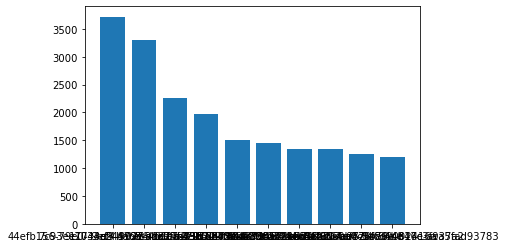

44efb156-79e0-43e9-bab8-9d377f2e2185 OLAY防曬淨白乳液(UV)SPF19-150ml 390 3720 9
7c93ee17-9ef3-479c-a9e2-c4791ae422da 新東陽原味德式香腸-160g 85 3303 39
17034cf4-9078-401e-b736-2c75c911bcd7 Saborino晚安面膜28PC 452 2260 5
a2499275-bd05-43b0-8b3e-4af30571ea54 聲寶TQ-BA30C日式多功能料理鍋3L 988 1976 2
eedcdefa-3997-4796-bf72-2b23cc8abc07 歐樂B PRO 1 3D電動牙刷-白色 1499 1499 1
c7e01b71-ff4b-439c-83cd-d1ff956ba4c1 晶工牌JK-103多功能不鏽鋼電碗1.5L 722 1444 2
b529c84a-8085-444b-b200-feec78ff54be 冷藏澳洲黑傑克板腱牛排(每盒約200g) 450 1350 3
0f8d3904-374d-4443-a0b0-5e6d9002416a 義美寶吉葡萄果汁ＱＱ糖-176g 75 1350 18
1be09c5d-ef6d-4ef5-8ba9-4b17c3f937a2 華元海蝦蝦餅甜辣口味 65 1252 20
be658a26-a072-476e-846e-aca5fad93783 刷樂超細滑潔舌牙線棒650支 399 1197 3
('44efb156-79e0-43e9-bab8-9d377f2e2185', 'OLAY防曬淨白乳液(UV)SPF19-150ml', 390, 3720, 9)
('7c93ee17-9ef3-479c-a9e2-c4791ae422da', '新東陽原味德式香腸-160g', 85, 3303, 39)
('17034cf4-9078-401e-b736-2c75c911bcd7', 'Saborino晚安面膜28PC', 452, 2260, 5)
('a2499275-bd05-43b0-8b3e-4af30571ea54', '聲寶TQ-BA30C日式多功能料理鍋3L', 988, 1976, 2)
('eedcdefa-3997-4796-bf

In [22]:
top_K_prod=get_top_k_product(train_df,10,'total_sales')
for i in top_K_prod: print(i)

## 銷售量前K名的商品

In [23]:
df_group_by_prod.sort_values(by='quantity',ascending=False)

,product,sales_price,quantity,total_sales
238,7c93ee17-9ef3-479c-a9e2-c4791ae422da,678,39,3303
163,5674d374-fe32-4898-991e-e30bb92e8b2c,116,23,667
60,1be09c5d-ef6d-4ef5-8ba9-4b17c3f937a2,372,20,1252
30,0f8d3904-374d-4443-a0b0-5e6d9002416a,600,18,1350
331,b6b9d87b-7fb4-424d-860c-baae35008533,425,13,1105
...,...,...,...,...
305,aaa5a5f8-99af-4744-b440-27e4fbad18e9,95,1,95
306,aaaf8829-150e-4b2d-9c81-58ef96f73689,79,1,79
307,aac1198c-dba3-4a72-bbd2-526df66f3d6f,155,1,155
308,aada8ad0-3638-4b06-abc6-5ee65877439c,35,1,35


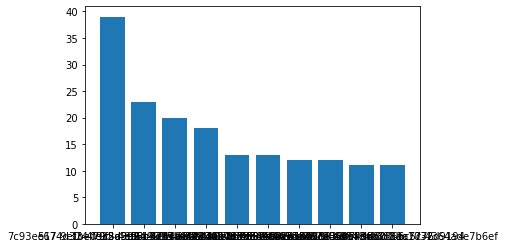

7c93ee17-9ef3-479c-a9e2-c4791ae422da 新東陽原味德式香腸-160g 85 3303 39
5674d374-fe32-4898-991e-e30bb92e8b2c 百事可樂 29 667 23
1be09c5d-ef6d-4ef5-8ba9-4b17c3f937a2 華元海蝦蝦餅甜辣口味 65 1252 20
0f8d3904-374d-4443-a0b0-5e6d9002416a 義美寶吉葡萄果汁ＱＱ糖-176g 75 1350 18
b6b9d87b-7fb4-424d-860c-baae35008533 米小餅-金薯口味(米果) 85 1105 13
14fb6180-07f9-4699-98ec-e857b058e7dd 家樂福羊肉火鍋片-180g 93 1145 13
c170b78a-fe4e-461c-aa19-55bca36b2366 【全素】隨緣素肉骨茶麵(袋) 90g 69 828 12
b3f8864b-45fe-49c2-aaf7-cba8889a7776 BF薄荷岩鹽檸檬糖138g 68 795 12
76f0d2df-6810-446f-9b50-1ac1032d9194 【Nakery裸焙坊】法式香蒜麵包 (每條約162g) 39 429 11
51871ce3-8849-40d1-bc5c-4364ade7b6ef 安佳鮮奶油250ml 93 999 11
('7c93ee17-9ef3-479c-a9e2-c4791ae422da', '新東陽原味德式香腸-160g', 85, 3303, 39)
('5674d374-fe32-4898-991e-e30bb92e8b2c', '百事可樂', 29, 667, 23)
('1be09c5d-ef6d-4ef5-8ba9-4b17c3f937a2', '華元海蝦蝦餅甜辣口味', 65, 1252, 20)
('0f8d3904-374d-4443-a0b0-5e6d9002416a', '義美寶吉葡萄果汁ＱＱ糖-176g', 75, 1350, 18)
('b6b9d87b-7fb4-424d-860c-baae35008533', '米小餅-金薯口味(米果)', 85, 1105, 13)
('14fb6180-07f9-4699-98ec-e8

In [24]:
top_K_prod=get_top_k_product(train_df,10,'quantity')
for i in top_K_prod: print(i)

# 整體銷售狀況

In [25]:
total_records=len(train_df)
total_transactions=len(train_df.groupby('id'))
total_customer=len(train_df.groupby('customer'))
#所有發票上的金額 ## same as train_df['sales_price'].sum()
total_sales=train_df.groupby('id')['total_sales'].sum().sum()   
total_products=len(train_df.groupby('product'))

In [26]:
print('發票數量:',total_transactions)
print('客戶數量:',total_customer)
print('平均客戶消費次數:',total_transactions/total_customer)
print('平均發票金額:',total_sales/total_transactions)
print('平均每筆發票的商品種類:',total_records/total_transactions)
print('商品種類:',total_products)

發票數量: 86
客戶數量: 8
平均客戶消費次數: 10.75
平均發票金額: 1393.9302325581396
平均每筆發票的商品種類: 9.290697674418604
商品種類: 482


## 每個顧客的購買總金額

In [27]:
#train_df[train_df['customer']=='003c1701-7951-41f7-8e3e-7c102daa28a0']

In [28]:
df_group_by_customer=train_df.groupby('customer')['total_sales'].agg(['sum'])
df_group_by_customer

,sum
customer,
00113cb1-293b-4c73-8844-4ca901c819ab,5941
003c1701-7951-41f7-8e3e-7c102daa28a0,2995
0053e832-3011-4464-9157-955cd5b1fb76,5095
00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,18410
00eedbf8-1784-4e80-8ce3-a11ef8198c87,4819
01220559-7825-428b-b0dd-abe76688c3bb,7332
01e377d9-2b83-4c9f-96ba-ed468c510eb3,59591
020457be-42c6-4074-b15c-ddae166d297a,15695


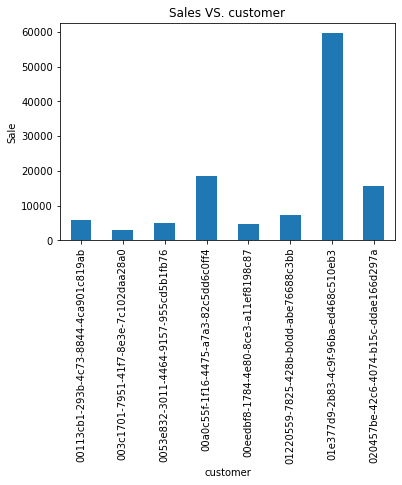

In [29]:
#長條圖: 每個顧客的購買總金額
df_group_by_customer['sum'].plot(kind='bar');
plt.title("Sales VS. customer")
plt.xlabel("customer")
plt.ylabel("Sale")
plt.show()

## 每筆發票的金額

In [30]:
df_group_by_id=train_df.groupby('id')['total_sales'].sum().reset_index()    
df_group_by_id=df_group_by_id.sort_values(by='total_sales') #ascending=False
df_group_by_id

,id,total_sales
65,ccefe038-e08f-409b-856e-b3bce9b975e6,354
70,d990fe98-8dff-4d7e-b686-d79ddda05e2f,487
81,f2030d62-55df-4399-9dcb-199b1a04d440,516
28,536bc374-20f1-46d4-a02c-63799188a9b6,522
5,184e18c1-35ac-48fe-8df4-2ba4c8e75179,548
...,...,...
26,4ec0b688-36e0-4018-99fa-045f6ca1e3cf,2330
25,4dd5ac40-a1b3-43a2-be16-aa1392a4fde0,2363
54,a9174342-0889-4d43-b111-d604c05b28ee,2369
59,bcbf1a60-76f8-4768-a3ab-bb3ad8aee1fd,2440


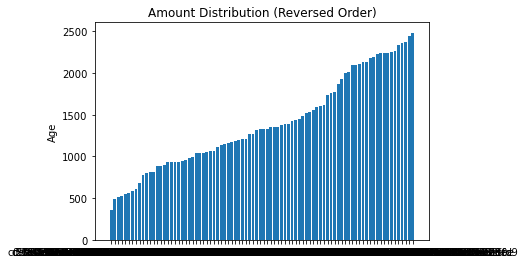

In [31]:
plt.bar(df_group_by_id['id'], df_group_by_id['total_sales'])
plt.ylabel('Age')
plt.title('Amount Distribution (Reversed Order)')
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

## 查詢某客戶的購買歷史記錄(消費及其金額)

In [32]:
def show_purchase_by_customer(df,cid):
    dataset=df[df['customer']==cid].groupby('id')['total_sales'].agg(['sum']).reset_index()
    total_amounts=dataset['sum'].sum()
    print(f'客戶({cid})消費筆數:{len(dataset)}, 累積消費金額為 {total_amounts}元,平均每次消費{total_amounts/len(dataset)}' )
    return dataset,total_amounts

In [33]:
customer_id='00113cb1-293b-4c73-8844-4ca901c819ab'
dataset,total_amounts=show_purchase_by_customer(train_df,customer_id)
dataset


客戶(00113cb1-293b-4c73-8844-4ca901c819ab)消費筆數:6, 累積消費金額為 5941元,平均每次消費990.1666666666666


,id,sum
0,65f9657e-a473-46be-bf6c-ebbc508297a9,1611
1,a70c6a3c-d8b8-4280-b85f-56eeb9621006,607
2,a9a35c16-433c-47a3-a965-5a354b51142c,985
3,ccefe038-e08f-409b-856e-b3bce9b975e6,354
4,cf8105d9-95e9-418e-85e7-bf2f7a8ae2cc,1868
5,f2030d62-55df-4399-9dcb-199b1a04d440,516


In [34]:
dataset,total_amounts=show_purchase_by_customer(train_df,'003c1701-7951-41f7-8e3e-7c102daa28a0')
dataset


客戶(003c1701-7951-41f7-8e3e-7c102daa28a0)消費筆數:3, 累積消費金額為 2995元,平均每次消費998.3333333333334


,id,sum
0,1b5ae746-37f0-442e-aa58-ffee397a2c6a,795
1,3ecffe33-4293-423d-a533-c115ebf0fab4,1393
2,d96c447d-8c73-45dd-8cb9-1cde700485a3,807


## 查詢發票的交易明細

In [35]:
dataset=train_df[train_df['id']=='65f9657e-a473-46be-bf6c-ebbc508297a9'][['product_name','sales_price','quantity','total_sales']].reset_index()

In [36]:
dataset

,index,product_name,sales_price,quantity,total_sales
0,475,台糖精選魚油膠囊,397,1,397
1,484,家樂福BIO有機紅肉火龍果(每盒約850克/2粒),99,1,99
2,600,潔霜芳香浴廁清潔劑--檸檬,39,1,39
3,730,小瓜呆脆笛酥-草莓口味195G,89,1,89
4,768,好神拖輕巧手壓旋轉拖把組,888,1,888
5,775,中興履歷無洗米1.5Kg,99,1,99


In [37]:
def show_invoice(df,tid,show_detail=True):
    data=df[df['id']==tid][['product_name','sales_price','quantity','total_sales']].reset_index()
    amount=data['total_sales'].sum()
    counts=len(data)
    if show_detail:
        print(f'發票號碼:{tid} 總金額: {amount}，明細如下:')
        print(f'    {"品項":30},{"數量":3},{"單價":5}')
        for i in range(len(data)):
            item = data.iloc[i]['product_name']
            q = data.iloc[i]['quantity']
            price=data.iloc[i]['sales_price']
            print(f'{i+1}:{item:<30}{q:3}{price:>5}')
    
    return amount,len(data),data


In [38]:
show_invoice(train_df,'a70c6a3c-d8b8-4280-b85f-56eeb9621006',show_detail=False)

(607,
 4,
    index    product_name  sales_price  quantity  total_sales
 0    178        威尼斯冷水壺1L          148         2          296
 1    553  【火鍋好物】西北日式手工蝦餃           39         2           78
 2    753      百研三合一瓶蓋清潔刷           75         1           75
 3    782   家樂福豬肉火鍋片-180g           79         2          158)

In [39]:
show_invoice(train_df,'a70c6a3c-d8b8-4280-b85f-56eeb9621006',show_detail=True)

發票號碼:a70c6a3c-d8b8-4280-b85f-56eeb9621006 總金額: 607，明細如下:
    品項                            ,數量 ,單價   
1:威尼斯冷水壺1L                        2  148
2:【火鍋好物】西北日式手工蝦餃                  2   39
3:百研三合一瓶蓋清潔刷                      1   75
4:家樂福豬肉火鍋片-180g                   2   79


(607,
 4,
    index    product_name  sales_price  quantity  total_sales
 0    178        威尼斯冷水壺1L          148         2          296
 1    553  【火鍋好物】西北日式手工蝦餃           39         2           78
 2    753      百研三合一瓶蓋清潔刷           75         1           75
 3    782   家樂福豬肉火鍋片-180g           79         2          158)

In [40]:
df_group_by_id=train_df.groupby('id').sum().reset_index()   
df_group_by_id

,id,sales_price,quantity,age_group,month,year,day,total_sales
0,0ad57976-5aca-4218-a907-aef772fc1039,1305,24,68.0,85,34357,510,1600
1,11d772a7-5a16-4e87-8ac2-0c438b1ada18,1309,12,44.0,77,22231,22,1329
2,14317593-ab59-43c5-af1e-a9b557e83e0f,892,9,20.0,35,10100,145,1429
3,17b18cda-3072-4355-a527-080f070fae7d,1095,17,28.0,35,14140,84,1378
4,181be294-2190-47db-bab6-519f76ccf681,1850,25,110.0,110,44462,594,2093
...,...,...,...,...,...,...,...,...
81,f2030d62-55df-4399-9dcb-199b1a04d440,516,6,18.0,42,12120,18,516
82,fa56589e-1207-405e-b150-7869d50964f3,393,14,40.0,50,20210,230,561
83,fb8911a9-8ed2-4219-b629-24d01db08b18,1181,18,85.0,85,34357,289,1210
84,fc2a99ec-19cd-4561-b050-efdd18c5c0a6,1323,18,90.0,90,36378,558,1323


# 每月總銷售額

In [41]:
sales_per_month=train_df.groupby('YearMonth')['total_sales'].agg(['sum']).reset_index()
sales_per_month



,YearMonth,sum
0,2020-05,4927
1,2020-06,4760
2,2020-07,6256
3,2020-08,5674
4,2020-09,3262
5,2020-10,9323
6,2020-11,5743
7,2020-12,5795
8,2021-01,1156
9,2021-02,1358


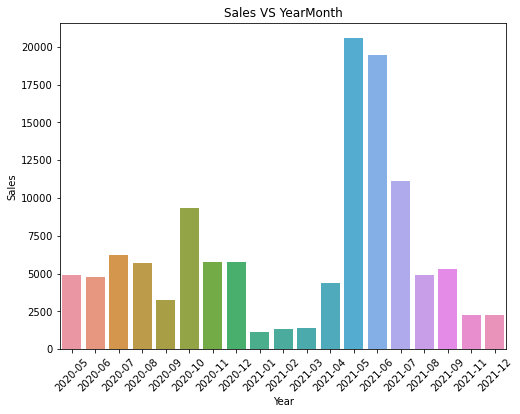

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_per_month,x='YearMonth',y='sum')
plt.title('Sales VS YearMonth')
plt.ylabel('Sales')
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

## 每月各分店的銷售額

In [43]:
print('共有店家:',len (train_df.groupby('store')))

共有店家: 12


In [44]:
sales_per_month_store=train_df.groupby(['YearMonth','store'])['total_sales'].agg(['sum'])
sales_per_month_store

sum
YearMonth store                                     
2020-05   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1038
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  1560
          f75c7c64-a007-4eda-96e2-0fc698e2538f  2329
2020-06   51cbbfb9-85a5-4032-8f03-7b1c43d08e49   807
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  2184
          f75c7c64-a007-4eda-96e2-0fc698e2538f  1769
2020-07   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1429
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  1108
          f37bf176-2d90-4ab8-b35d-b5c357524ab9  3719
2020-08   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1066
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2   932
          f37bf176-2d90-4ab8-b35d-b5c357524ab9  2222
          f75c7c64-a007-4eda-96e2-0fc698e2538f  1454
2020-09   51cbbfb9-85a5-4032-8f03-7b1c43d08e49   888
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  1332
          f75c7c64-a007-4eda-96e2-0fc698e2538f  1042
2020-10   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  3137
          a3fbf40e-3b91-4b29-b6cf-1bcff722e7ec  1858
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  1589
          f75c7c64-a007-4eda-96e2-0fc698e2538f  2739
2020-11   49171894-8056-4ffb-9242-472997c4b865  3905
          51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1043
          88a89e42-64aa-442d-9544-4fdad63f308f   795
2020-12   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  3471
          88a89e42-64aa-442d-9544-4fdad63f308f   807
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  1517
2021-01   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1156
2021-02   51cbbfb9-85a5-4032-8f03-7b1c43d08e49  1358
2021-03   88a89e42-64aa-442d-9544-4fdad63f308f  1393
2021-04   aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  4381
2021-05   73869acb-3d56-4375-9ba2-afe2bb3c2bf5  3959
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  6878
          dd27d4dd-2133-4401-84f5-41ac1327c7fc  2423
          f37bf176-2d90-4ab8-b35d-b5c357524ab9  7286
2021-06   39653f7d-f888-4f53-9cfe-d9143f7e03e0  4100
          73869acb-3d56-4375-9ba2-afe2bb3c2bf5  4894
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  2363
          dd27d4dd-2133-4401-84f5-41ac1327c7fc  2447
          f37bf176-2d90-4ab8-b35d-b5c357524ab9  5651
2021-07   39653f7d-f888-4f53-9cfe-d9143f7e03e0   884
          73869acb-3d56-4375-9ba2-afe2bb3c2bf5  1329
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  2237
          b962d98f-acca-433f-9f0a-a07222627383  1442
          f2d064b2-a928-48aa-be83-a5b3bfc02f41  5253
2021-08   39653f7d-f888-4f53-9cfe-d9143f7e03e0  4373
          f2d064b2-a928-48aa-be83-a5b3bfc02f41   522
2021-09   73869acb-3d56-4375-9ba2-afe2bb3c2bf5   897
          aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  2102
          f2d064b2-a928-48aa-be83-a5b3bfc02f41  2330
2021-11   aad5ef5c-11f4-43d9-8506-19cfacfa8fc2  2228
2021-12   f2d064b2-a928-48aa-be83-a5b3bfc02f41  2252

## 每月各分店銷售狀況

<AxesSubplot:xlabel='YearMonth', ylabel='sum'>

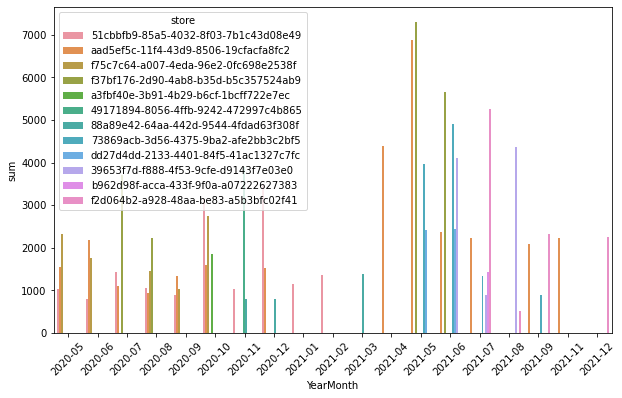

In [45]:
sales_per_month_store=train_df.groupby(['YearMonth','store'])['total_sales'].agg(['sum']).reset_index()
sales_per_month_store
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x='YearMonth', y='sum', data=sales_per_month_store, hue='store')

## 分店每月銷售狀況

In [46]:
def analyze_store_sales(df,store_id):
    sales_per_month_store=df.groupby(['YearMonth','store'])['total_sales'].agg(['sum']).reset_index()
    data=sales_per_month_store[sales_per_month_store['store']==store_id]
    data=data[['YearMonth','sum']]
    # Create a DataFrame with all months (including missing ones) and fill missing values with 0
    all_months = pd.date_range(start='2020-05', end='2022-01', freq='M')
    df_m = pd.DataFrame({'YearMonth': all_months})
    df_m['YearMonth']= df_m['YearMonth'].dt.to_period('M').apply(str)    
    df_data = pd.merge(df_m,data, on=['YearMonth'], how='left').fillna(0)
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45)
    sns.barplot(x='YearMonth', y='sum', data=df_data)
    return df_data
   

,YearMonth,sum
0,2020-05,1038.0
1,2020-06,807.0
2,2020-07,1429.0
3,2020-08,1066.0
4,2020-09,888.0
5,2020-10,3137.0
6,2020-11,1043.0
7,2020-12,3471.0
8,2021-01,1156.0
9,2021-02,1358.0


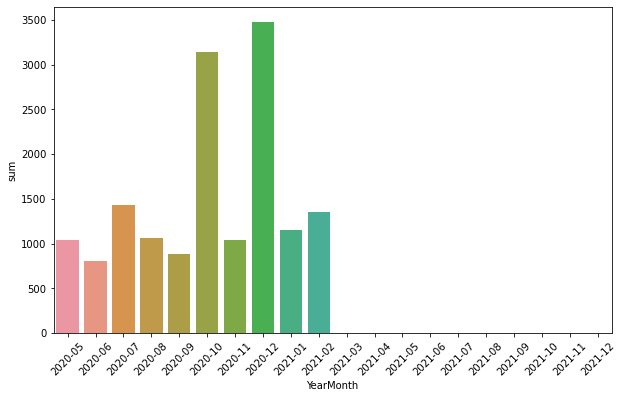

In [47]:
analyze_store_sales(train_df,store_id='51cbbfb9-85a5-4032-8f03-7b1c43d08e49')

,YearMonth,sum
0,2020-05,0.0
1,2020-06,0.0
2,2020-07,0.0
3,2020-08,0.0
4,2020-09,0.0
5,2020-10,0.0
6,2020-11,0.0
7,2020-12,0.0
8,2021-01,0.0
9,2021-02,0.0


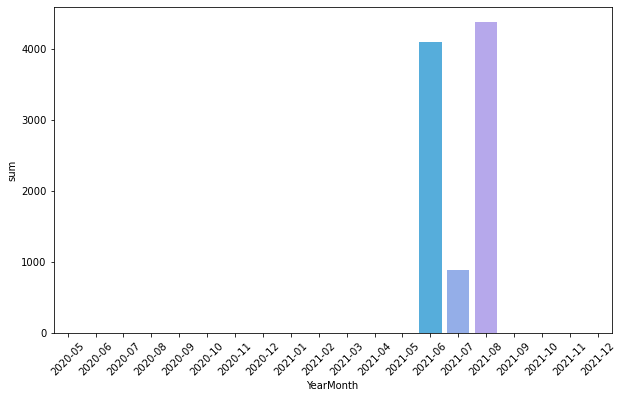

In [48]:
analyze_store_sales(train_df,store_id='39653f7d-f888-4f53-9cfe-d9143f7e03e0')


## 產品名稱相似度

In [49]:
train_df.head()

,id,order_date,product_name,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,month,year,YearMonth,day_name,day,total_sales
0,4dd5ac40-a1b3-43a2-be16-aa1392a4fde0,2021/6/10 22:57,絲花極柔化妝棉66片,003dc937-e898-4259-870a-4a9afe2eacd6,96,2,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,6,2021,2021-06,Thursday,10,192
1,181be294-2190-47db-bab6-519f76ccf681,2021/5/27 2:42,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,aad5ef5c-11f4-43d9-8506-19cfacfa8fc2,4b52005f-878a-4b2b-95ee-d9e2d719046a,23ab2965-ecd8-4bb2-933f-424b1f984d39,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,5,2021,2021-05,Thursday,27,48
2,4ec0b688-36e0-4018-99fa-045f6ca1e3cf,2021/9/9 23:16,光泉茉莉茶園蘋果紅茶-250ml,004e97ea-3847-4b71-9b6d-380fbc2067bd,48,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,f2d064b2-a928-48aa-be83-a5b3bfc02f41,db83dcc1-85c9-44f9-a047-426b02e8e1a3,b611c86e-0693-41bb-98d4-6de1b4a837f5,01e377d9-2b83-4c9f-96ba-ed468c510eb3,NaN,5.0,9,2021,2021-09,Thursday,9,48
3,11d772a7-5a16-4e87-8ac2-0c438b1ada18,2021/7/2 9:56,新東陽雪花金錢豬肉乾,00818a2f-857a-402e-97e5-fed82eb24f50,139,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,73869acb-3d56-4375-9ba2-afe2bb3c2bf5,0ced232a-ba28-4238-8411-264c228aa751,9aa7200e-ff9f-42e4-b635-b021e6075b7e,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,NaN,4.0,7,2021,2021-07,Friday,2,139
4,a9174342-0889-4d43-b111-d604c05b28ee,2020/11/21 14:35,義美天然取向蘇打餅乾(紫菜),00c7a05e-aa41-47de-9bda-ee24f3cb224f,71,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,49171894-8056-4ffb-9242-472997c4b865,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,0053e832-3011-4464-9157-955cd5b1fb76,NaN,4.0,11,2020,2020-11,Saturday,21,71


In [50]:
train_df[['product_name']].isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
794    False
795    False
796    False
797    False
798    False
Length: 799, dtype: bool

In [51]:
#make sure all rows having product name
nan_rows = train_df[train_df[['product_name']].isna().any(axis=1)]
#nan_rows.index
#train_df.iloc[[nan_rows]]

In [52]:
set(train_df['product_name'])

{'100%純棉新生兒專用棉紗肚衣(3個月)-顏色隨機出貨',
 '2吋兩孔西德夾',
 '77健享滋味-高鈣起司牛奶餅73.8g',
 'ACE無糖Q軟糖-48g',
 'Agnesi拿波里義大利麵醬400g',
 'Airwaves超涼無糖薄荷糖-蜂蜜檸檬',
 'BF薄荷岩鹽檸檬糖138g',
 'Biore抗菌洗手慕絲-自然清香-280ml自然清香',
 'CAB冷藏美國安格斯菲力牛排180g(貼體包裝)',
 'Calbee蝦條(和風醬汁口味)',
 'Classico 義大利麵醬(臘腸) 680g',
 'Conas妮娜-搖滾系跳跳糖草莓巧克力條',
 'Dr.Q百香果蒟蒻265g',
 'Elastine植萃系列控油洗髮精-綠薄荷',
 'GATSBY隨意塑型髮腊攜帶型',
 'GENKI BEAR 半月隨身水瓶500ml-黑色',
 "Hershey'S Nuggets牛奶巧克力包",
 'KAKA珍四鮮-冠軍魷(創意包)36g',
 'KEYWAY 大QQ椅',
 'KIRIN午後紅茶 - 檸檬紅茶1500ml',
 'KONOMI相撲手脆紫菜-山葵風味',
 'KONOMI相撲手脆紫菜-綠咖哩',
 'KORMOSA韓素香紅燒湯麵-110gx4',
 'OK洋芋片燒烤風味',
 'OLAY防曬淨白乳液(UV)SPF19-150ml',
 'OPEN整理收納盒',
 'OP生物分解抗菌保鮮膜(500尺)',
 'ORIHIRO蒟蒻果凍富士蘋果溫州蜜柑',
 'Olay多元修護日霜',
 'POPCORNERS爆米花脆片切達起司口味',
 'Pocky百奇 草莓粒粒巧克力棒',
 'RASTO RB24 33W 氮化鎵 PD+QC3.0雙孔快充器',
 'Red Bull 紅牛能量飲料-無糖250mlx4',
 'SANA豆乳美肌超微細保濕噴霧150g',
 'Saborino晚安面膜28PC',
 'St.Michel 奶油酥餅150g克',
 'Sunny Ranch每日堅果隨手包-綜合堅果乾',
 'Tarami美味蒟蒻果凍-白桃味',
 'VICO 100%椰子水 1000ml',
 'WASUKA 特級巧克力威化捲 600g',
 '[限時限量供應]樂福九號便當(烤雞骨腿+薄鹽鯖魚)',
 '[限量]家樂福黑糖沙琪瑪750g克',
 '[限

In [53]:
train_df=pd.read_csv("dataset/商品對照表_-_商品對照表.csv")
product_names=list(set(train_df['product_name']))

In [54]:
from difflib import SequenceMatcher
#content-based : only use product name as a factor

def top_k_recommnd_item(p_name,k=5):
    recommand_list={}
    for name in product_names:
        similarity = SequenceMatcher(None,name,p_name).ratio()
        recommand_list[name]=similarity
        #print(f"{name}({name_to_pid_dict[name]})和{com_prod}相似度為{similarity}")
    
    recommand_sorted=sorted(recommand_list.items(), key=lambda item: item[1], reverse=True)[:k]
    # add product id 
    return [(item[0],name_to_pid_dict[name],item[1])  for item in recommand_sorted]


In [55]:
com_prod = "光泉茉莉茶園紅茶蘋果-250ml" #"特上檸檬紅茶"
top_k_recommnd_item(com_prod,10)

[('光泉茉莉茶園蘋果紅茶-250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.875),
 ('泰山冰鎮水果茶-250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.4827586206896552),
 ('義美錫蘭紅茶TP250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.4827586206896552),
 ('立頓檸檬紅茶TP250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.4827586206896552),
 ('雀巢茶品錫蘭原葉紅茶530ml',
  'c61e069d-24f0-4f74-9350-1447a14f0a4e',
  0.45161290322580644),
 ('波蜜靠茶初茗綠茶250mlx6',
  'c61e069d-24f0-4f74-9350-1447a14f0a4e',
  0.45161290322580644),
 ('義美酸梅湯-250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.4444444444444444),
 ('義美經典奶茶 250ml', 'c61e069d-24f0-4f74-9350-1447a14f0a4e', 0.42857142857142855),
 ('茶裏王台式綠茶微甜Pet1250ml',
  'c61e069d-24f0-4f74-9350-1447a14f0a4e',
  0.4117647058823529),
 ('黑松茶花綠茶-無糖Pet-580ml',
  'c61e069d-24f0-4f74-9350-1447a14f0a4e',
  0.4117647058823529)]

## Exercise

### 分析顅客購買商品的單價區間 (最大,最小,平均)


### 分析客戶購買時段 (上午: 07:00-11:00,中午11:00-14:00,下午:14:00-21:00, 晚上:21:00-07:00)